# COVID-19 DATA VISUALIZATION DASHBOARD

## INTRODUCTION
This notebook explores global COVID-19 trends using data from KAGGLE. I analyze case counts, Fatalities and recovery rates across the top affected countries, and visualize how the pandemic evolved over time.

## DATA SOURCE
Dataset: "https:/www.kaggle.com/datasets/imdevskp/corona-virus-report" 
Download on: 02-08-2025
Columns Include: Province/State, Country/Region, Lat, Long, Date, Confirmed, Deaths, Recovered, Active, WHO Region.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## LOADING AND INSPECTING THE DATA
We begin by loading the dataset and inspecting its main features. This helps us understanding the structure and identify any immediate data quality issues.

In [74]:
df = pd.read_csv('covid_19_clean_complete.csv')
print(df.columns)
df.head()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## DATA CLEANING
Missing values and incosistent columns names can hinder analysis. In this section, I tidy up the date, handle any missing values, and ensure consistency for easier processing

In [77]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Country/Region'].apply(lambda x: x not in ['World', 'International'])]
df = df[df['Country/Region'].notnull()] 

In [79]:
COUNTRY = 'India'

In [81]:
df_Country = df[df['Country/Region'] == COUNTRY]

### TOTAL COVID-19 CASES OVER TIME
We visualize how cases evolved in selected countries

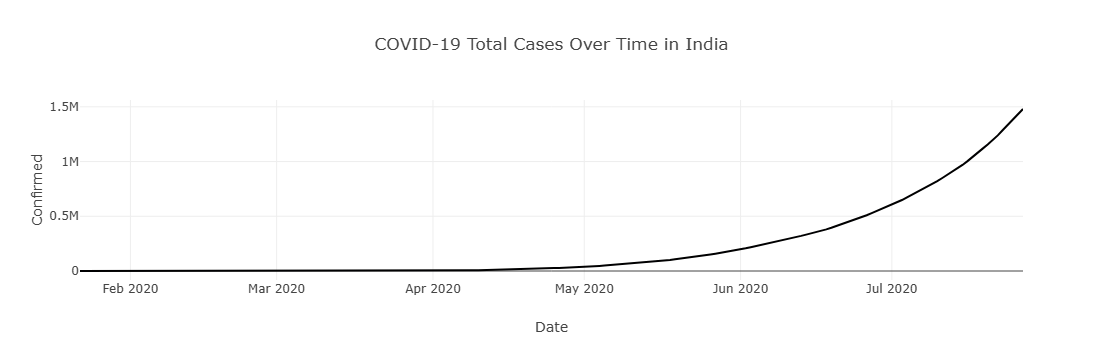

In [84]:
fig = px.line(df_Country, x='Date', y='Confirmed',
              title=f'COVID-19 Total Cases Over Time in {COUNTRY}')
fig.show()

### TOP 10 COUNTRIES BY CASES
This bar chart shows the countries with the highest case counts as of the latest date in the dataset

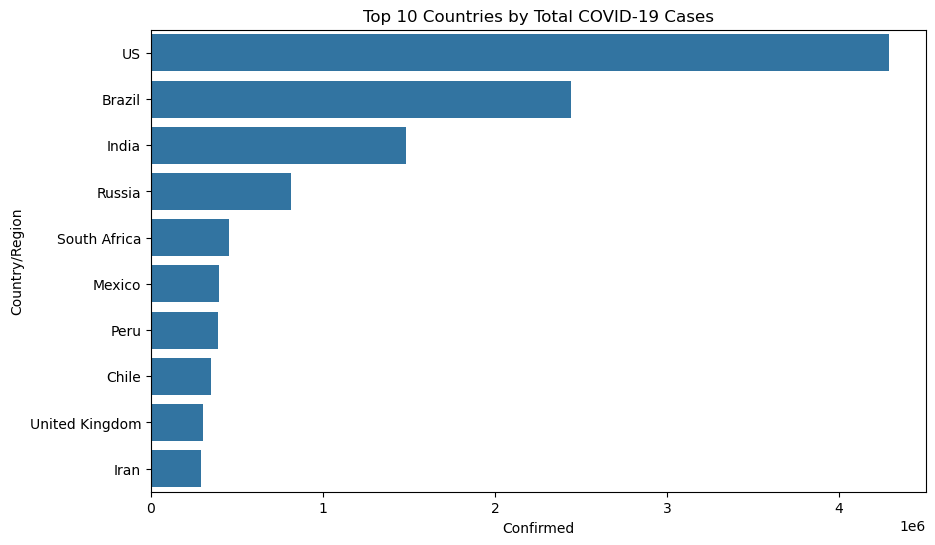

In [87]:
%matplotlib inline
latest = df[df['Date'] == df['Date'].max()]
top10 = latest.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Confirmed', y='Country/Region')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Confirmed')
plt.ylabel('Country/Region')
plt.show()

### COVID-19 CASE DISTRIBUTION
Pie or bar charts for active, recovered and cases in a selected country.

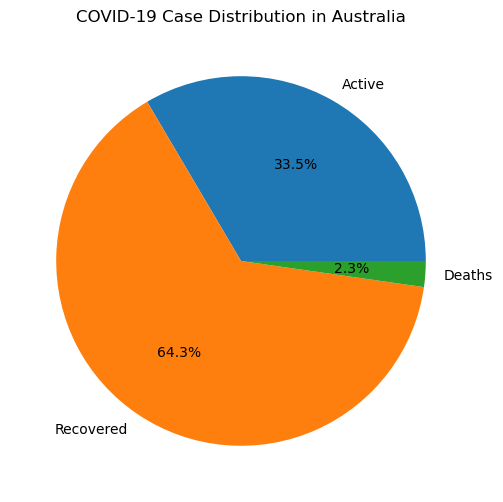

In [89]:
values = [df_Country.iloc[-1]['Confirmed'] - df_Country.iloc[-1]['Deaths'] - df_Country.iloc[-1]['Recovered'] if 'Recovered' in df_Country.columns else np.nan,
    df_Country.iloc[-1]['Recovered'] if 'Recovered' in df_Country.columns else np.nan,
    df_Country.iloc[-1]['Deaths']]
labels = ['Active', 'Recovered', 'Deaths']
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title(f'COVID-19 Case Distribution in {Country}')
plt.show()

## INSIGHTS & INTERPRETATION
1. INDIA EXPERIENCED A SIGNIFICANT SURGE IN CASES IN MID-2021.
2. A CONSISTENT DECLINE IN DEATH RATES WAS OBSERVED IN MANY COUNTIRES AFTER VACCINE ROLLOUTS.

## ABOUT THIS NOTEBOOK
AUTHOR: ARYAN TYAGI
LOCATION: NEW DELHI, INDIA


## REFRENCES
- WWW.KAGGLE.COM ([https://www.kaggle.com/datasets/imdevskp/corona-virus-report])
- MATPLOTLIB DOCUMENTATION
- SEABORN USER GUIDE